# Loading Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [5]:
books_df = pd.read_csv('books.csv')
book_tags_df = pd.read_csv('book_tags.csv')
ratings_df = pd.read_csv('ratings.csv')

## Viewing top 5 rows of Books.csv

In [6]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


## Viewing top 5 rows from Book_tags.csv 

In [7]:
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78


## Viewing top 5 rows from rating.csv

In [8]:
ratings_df.head()

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4


# How many books do not have an original title [books.csv]?

In [9]:
books_without_original_title = books_df['original_title'].isnull().sum()
print(f"Number of books without an original title: {books_without_original_title}")

Number of books without an original title: 36


# How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [10]:
filtered_books_df = books_df.dropna(subset=['original_title'])
unique_books_count = filtered_books_df['book_id'].nunique()
print(f"Number of unique books after removing records with null values in 'original_title': {unique_books_count}")

Number of unique books after removing records with null values in 'original_title': 363


In [11]:
unique_users_count = ratings_df['user_id'].nunique()
print(f"Number of unique users in the dataset: {unique_users_count}")

Number of unique users in the dataset: 40836


In [12]:
unique_tags_count = book_tags_df['tag_id'].nunique()
print(f"Number of unique tags in the dataset: {unique_tags_count}")

Number of unique tags in the dataset: 3651


In [13]:
most_frequent_tag_id = book_tags_df['tag_id'].value_counts().idxmax()
print(f"The most frequently used tag_id is: {most_frequent_tag_id}")

The most frequently used tag_id is: 4600


In [14]:
most_tagged_book = book_tags_df.groupby('goodreads_book_id')['count'].sum().idxmax()
most_tagged_book_title = books_df.loc[books_df['book_id'] == most_tagged_book, 'title'].values[0]
print(f"The book with the most counts of tags given by users is: {most_tagged_book_title}")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [16]:
merged_df = pd.merge(book_tags_df, books_df[['book_id', 'title']], how='left', left_on='goodreads_book_id', right_on='book_id')
most_tagged_book = merged_df.groupby('title')['count'].sum().idxmax()
print(f"The book with the most counts of tags given by users is: {most_tagged_book}")

The book with the most counts of tags given by users is: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


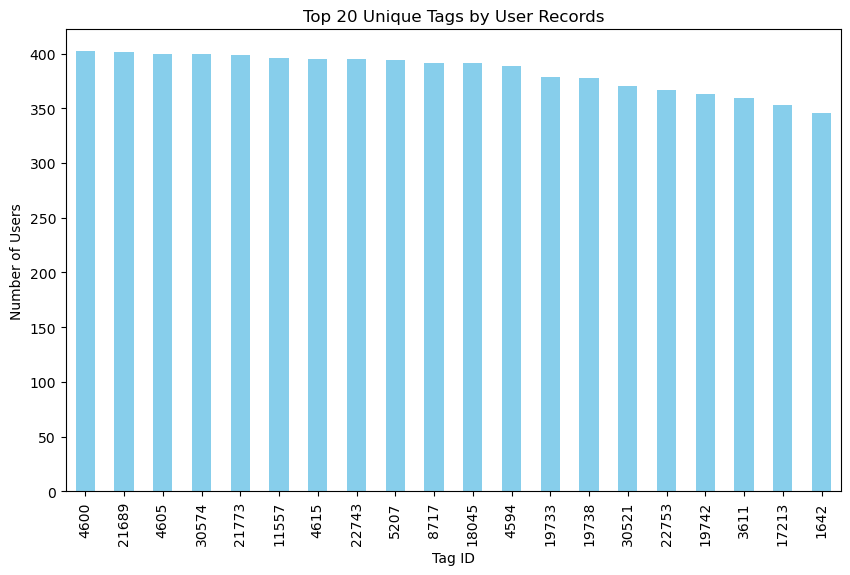

In [15]:
top_20_tags = book_tags_df.groupby('tag_id')['goodreads_book_id'].nunique().nlargest(20)
top_20_tags.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Unique Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of Users')
plt.show()